In [93]:
#Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import multivariate_normal as mvn
from scipy.stats import multinomial as mlvn
from scipy.stats import bernoulli as brn
from sklearn.model_selection import learning_curve
%matplotlib inline

In [94]:
os.listdir(os.getcwd())

['.Rhistory',
 'Group Task.ipynb',
 'Untitled1.ipynb',
 'Logistic Regression.ipynb',
 'group_slide.pptx',
 'scania_training.csv',
 'Untitled.ipynb',
 '~$group_slide.pptx',
 'cleaned_test.csv',
 'rds_cred_scania.json',
 'clean data.ipynb',
 'cleaned_train.csv',
 'scania_test.csv',
 '.ipynb_checkpoints',
 'Data_Prep.Rmd']

In [95]:
#Load Test Dataset

In [96]:
df_test = pd.read_csv('cleaned_test.csv')

In [97]:
df_test.head(4)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,60.0,3.829807,20.0,12.0,109.971891,243.996465,5706.847462,16864.168307,309805.071240,2682.000000,...,138.0,412.0,654.0,78.0,88.0,352695.855537,45904.714372,2.184383,10.185295,0.0
1,82.0,2.429194,68.0,40.0,204.790359,340.992577,2936.534354,21124.833594,298883.850185,292160.377708,...,276.0,1620.0,116.0,86.0,462.0,207501.807476,38335.529073,0.798507,2.165026,0.0
2,66002.0,2.000000,212.0,112.0,48.329609,148.604202,6889.036518,109704.416633,385325.242111,199486.000000,...,380368.0,440134.0,269556.0,1315022.0,153680.0,516.000000,32542.476942,0.953023,36.394544,0.0
3,59816.0,1.657330,1010.0,936.0,0.263870,326.727387,904.138343,32879.415395,210887.195392,173025.139602,...,243270.0,483302.0,485332.0,431376.0,210074.0,281662.000000,3232.000000,0.063288,6.113563,0.0


In [98]:
def corr_FeatSelect(corr_df, df_data, threshold = 0.9):
  
  N = corr_df.shape[0]

  results =[True for i in range(N)]

  for i in range(N):
    for j in range(i+1, N):
      if corr_df.iloc[i][j] >= threshold:
        if results[j]:
          results[j] = False

  selectedcolumns = df_data.columns[results]
  
  return selectedcolumns

In [99]:
#df_train = df_train.iloc[:, 1:]
#df_test = df_test.iloc[:,1:]

In [100]:
corr = df_test.corr()

In [101]:
selectedcolumns = corr_FeatSelect(corr, df_test) #select the columns based on the correlated features.

In [102]:
df_test = df_test[selectedcolumns]

In [103]:
df_test.shape

(16000, 142)

In [104]:
df_test.head(4)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ec_00,ed_000,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,60.0,3.829807,20.0,12.0,109.971891,243.996465,5706.847462,16864.168307,309805.071240,2682.000000,...,465.50,90.0,654.0,78.0,88.0,352695.855537,45904.714372,2.184383,10.185295,0.0
1,82.0,2.429194,68.0,40.0,204.790359,340.992577,2936.534354,21124.833594,298883.850185,292160.377708,...,2.86,102.0,116.0,86.0,462.0,207501.807476,38335.529073,0.798507,2.165026,0.0
2,66002.0,2.000000,212.0,112.0,48.329609,148.604202,6889.036518,109704.416633,385325.242111,199486.000000,...,2057.84,2158.0,269556.0,1315022.0,153680.0,516.000000,32542.476942,0.953023,36.394544,0.0
3,59816.0,1.657330,1010.0,936.0,0.263870,326.727387,904.138343,32879.415395,210887.195392,173025.139602,...,1541.32,1678.0,485332.0,431376.0,210074.0,281662.000000,3232.000000,0.063288,6.113563,0.0


In [105]:

test_cols =df_test.columns.values
test_attr_cols = test_cols[:-1]
# dataframe to numpy
test_data = df_test.to_numpy()
X_test, y_test = test_data[:,:-1], test_data[:,-1]
del test_data

y_test.shape

(16000,)

In [106]:
X_test.shape, y_test.shape

((16000, 141), (16000,))

In [107]:
#Load Training Dataset

In [108]:
df_train = pd.read_csv('cleaned_train.csv')
df_train.shape

(60000, 171)

In [109]:
#select columns based on their correlation

In [110]:
df_train = df_train[selectedcolumns]

In [111]:
df_train.shape

(60000, 142)

In [112]:
cols = df_train.columns.values
attr_cols = cols[:-1]
# dataframe to numpy
data = df_train.to_numpy()
X_train, y_train = data[:,:-1], data[:,-1]
del data

In [113]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 141), (60000,), (16000, 141), (16000,))

In [114]:

class LogisticRegression():
    
    def __init__(self, size):
        self.w = np.random.randn(size)
        self.b = np.random.randn(1)
    
    def fit(self, X, y, lr = 1e-3, epochs = 1e3, show_curve = False):
        epochs = int(epochs)
        N, D = X.shape
        J = np.zeros(epochs)
        for epoch in range(epochs):
            # CHECK
            p_hat = self.__forward(X)
            # CHECK
            J[epoch] = cross_entropy_v1(y, p_hat)
            self.w -= lr*(1/N)*X.T@(p_hat - y)
            self.b -= lr*(1/N)*np.sum(p_hat - y)
        if show_curve:
            plt.figure(figsize = (10, 6))
            plt.plot(J)
            plt.xlabel('epochs')
            plt.ylabel('$\mathcal{J}$')
            plt.title('Training Curve')
    
    def __forward(self, X):
        return sigmoid(X@self.w + self.b)
        
    def predict(self, X, thresh = 0.0306):
        return (self.__forward(X) >= thresh).astype(np.int32)

####### assistant function ###########

def sigmoid(h):
    epsilon = 1e-5
    return 1/(1 + np.exp(-h + epsilon))

def cross_entropy_v1(y, p_hat):
    epsilon = 1e-3
    return -(1/len(y)) * np.sum(y * np.log(p_hat + epsilon)\
                                + (1- y) * np.log(1 - p_hat + epsilon))

def accuracy(y, y_hat):
    return np.mean(y == y_hat)

def cost(X, y, model, thresh):
    # cost weights
    fp = 10
    fn = 500
    # predict
    y_hat_n = model.predict(X[y == 0], thresh = thresh)
    y_hat_p = model.predict(X[y == 1], thresh = thresh)
    # get cost
    cost1 = fp*np.sum(y_hat_n == 1)
    cost2 = fn*np.sum(y_hat_p == 0)
    return cost1 + cost2

In [115]:
def standardize(X):
    eposilon = 1e-3
    X_ = X.copy()
    try:
        N, D = X.shape
    except:
        D = 1
    for d in range(D):
        mean = np.mean(X_[:,d])
        std  = np.std(X_[:,d])
        X_[:,d] = (X_[:,d] - mean)/(std + eposilon)
    return X_

In [116]:
#standardize the dataset
X_test_norm = standardize(X_test)
X_train_norm = standardize(X_train)

In [117]:
#build model
X_test_norm.shape

(16000, 141)

In [118]:
#model.fit(X_norm, y, lr = 1e-2, epochs = 6000, show_curve = True)

In [119]:
#from sklearn.linear_model import LogisticRegression

In [120]:
LogisticReg = LogisticRegression(X_train.shape[1])

In [121]:
X_train.shape[1]

141

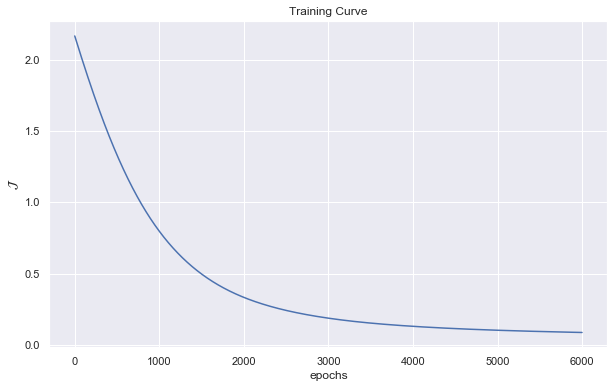

In [122]:
LogisticReg.fit(X_train_norm, y_train, lr = 1e-2, epochs = 6000, show_curve = True)

In [123]:
predictions = LogisticReg.predict(X_test_norm)

In [124]:
predictions.shape

(16000,)

In [125]:
accuracy(y_test, predictions)

0.8895625

In [ ]:
#GaussianNB Classification

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
model = GaussianNB()

In [37]:
model.fit(X_train_norm, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
predictions = model.predict(X_test_norm)

In [39]:
predictions.shape

(16000,)

In [40]:
from sklearn.metrics import confusion_matrix
#y_pred = classifier(X_train)
cm = confusion_matrix(y_test, predictions)
print(cm)

[[15222   403]
 [   78   297]]


In [41]:
accuracy = model.score(X_test_norm, y_test)
print(accuracy)

0.9699375


In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     15625
         1.0       0.42      0.79      0.55       375

    accuracy                           0.97     16000
   macro avg       0.71      0.88      0.77     16000
weighted avg       0.98      0.97      0.97     16000



In [44]:
from sklearn.metrics import precision_recall_curve

In [45]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions)

In [46]:
recall

array([1.   , 0.792, 0.   ])

In [47]:
precision

array([0.0234375 , 0.42428571, 1.        ])

Text(0.5, 1, 'Naive Bayes Confusion Matrix')

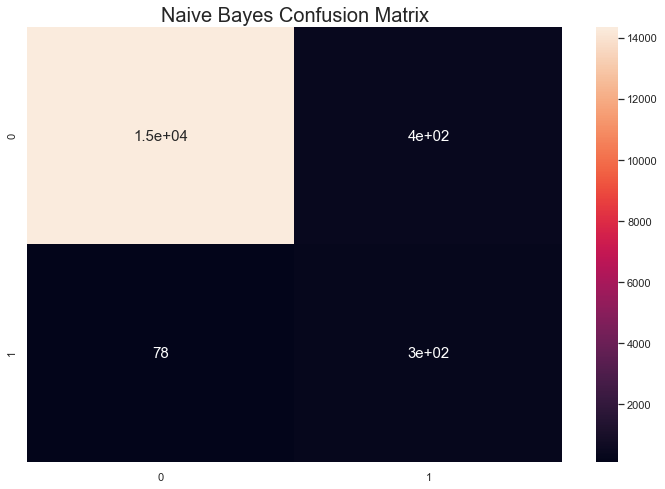

In [83]:
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, annot_kws = {'fontsize': 15}, robust = True)
plt.title('Naive Bayes Confusion Matrix', fontsize = 20)

In [126]:
#Having tried out the other models, we now try to fit the KNN Classifier from Sklearn library.

SyntaxError: invalid syntax (<ipython-input-126-942b5a983b53>, line 1)

In [49]:
#KNN Classifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [75]:
#scale the dataset
X_train_scale = preprocessing.scale(X_train_norm)

In [78]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_train_scale, y_train, test_size = .40, random_state = 123)

In [79]:
#train model
knn = neighbors.KNeighborsClassifier()

In [80]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Fit the model from Sklearn:

In [51]:
knn = KNNClassifier()
knn.fit(X_train_norm, y_train)


In [81]:
#Evaluate our Model 
y_pred = knn.predict(X_test)
print (metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     23601
         1.0       0.79      0.53      0.64       399

    accuracy                           0.99     24000
   macro avg       0.89      0.77      0.82     24000
weighted avg       0.99      0.99      0.99     24000



In [82]:
knncm = confusion_matrix(y_test, y_pred)
print(knncm)

[[23543    58]
 [  186   213]]


Text(0.5, 1, 'KNN Confusion Matrix')

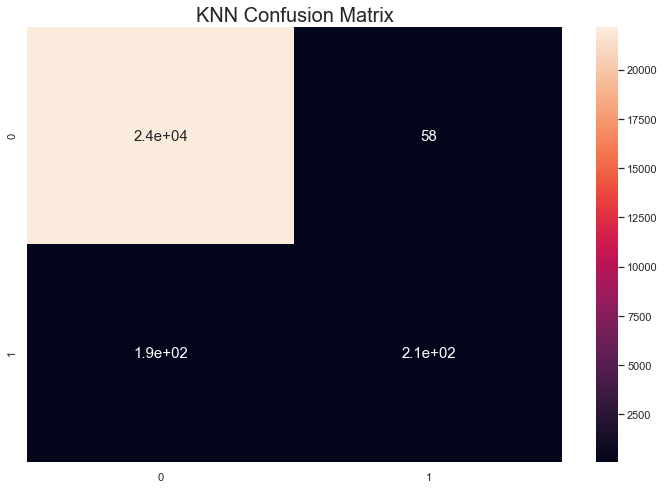

In [85]:
plt.figure(figsize = (12, 8))
sns.heatmap(knncm, annot = True, annot_kws = {'fontsize': 15}, robust = True)
plt.title('KNN Confusion Matrix', fontsize = 20)